Q1: What is hypothesis testing in statistics?
* Hypothesis testing is a formal procedure that uses sample data to evaluate competing statements about a population parameter. You posit a null hypothesis
𝐻
0
 (baseline claim, often “no effect” or a specific value) and an alternative hypothesis
𝐻
1
 (the effect/difference you’re looking for). You compute a test statistic from the sample, find its p-value assuming
𝐻
0
 is true, and then:

* If p-value ≤ chosen significance level
𝛼
α, you reject
𝐻
0
 in favor of
𝐻
1

* Otherwise, you fail to reject
𝐻
0
 (insufficient evidence against it).

* Core flow: define
𝐻
0
/
𝐻
1
 → choose
𝛼
α → pick test & check assumptions → compute statistic & p-value/critical value → decision → practical interpretation.

In [8]:
import numpy as np
from scipy import stats

# Suppose we want to test if the mean height differs from 170 cm
np.random.seed(1)
sample = np.random.normal(loc=172, scale=5, size=30)

t_stat, p_value = stats.ttest_1samp(sample, 170)

print("T-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Mean ≠ 170")
else:
    print("Fail to reject H0")

T-statistic: 1.8147452628510472
p-value: 0.0799200926599443
Fail to reject H0


Q2: What is the null hypothesis, and how does it differ from the alternative
hypothesis?
* Null hypothesis
𝐻
0
: a precise, testable baseline statement (e.g.,
𝜇
=
50
μ=50) used to compute probabilities.

* Alternative hypothesis
𝐻
1
: the rival claim you seek evidence for (e.g.,
𝜇
≠
50
μ

=50,
𝜇
>
50
μ>50, or
𝜇
<
50
μ<50).
* Difference:
𝐻
0
 is the status-quo benchmark;
𝐻
1
 represents a deviation/effect. Decisions are framed as “reject
𝐻
0
” or “fail to reject
𝐻
0
”; we never prove
𝐻
0
 true.

In [9]:
# Null hypothesis (H0): average daily sales = 500
# Alternative hypothesis (H1): average daily sales ≠ 500

sales = [480, 505, 495, 510, 490, 500, 515]

from scipy import stats
t_stat, p_value = stats.ttest_1samp(sales, 500)

print("Mean sales:", sum(sales)/len(sales))
print("T-stat:", t_stat, "p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 -> Evidence sales differ from 500")
else:
    print("Fail to reject H0 -> No evidence of difference")

Mean sales: 499.2857142857143
T-stat: -0.1568125120467968 p-value: 0.8805362023620841
Fail to reject H0 -> No evidence of difference


Q3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.
* The significance level
𝛼
α (often 0.05) is the maximum probability of a Type I error you are willing to tolerate—i.e., rejecting
𝐻
0
 when it’s actually true. It sets the threshold for evidence:
p-value approach: reject
𝐻
0
 if p-value ≤
𝛼
α.

* Critical-value approach: define rejection region(s) so that
𝑃
(
reject
∣
𝐻
0
)
=
𝛼
P(reject∣H
0
)=α.
Smaller
𝛼
α demands stronger evidence (harder to reject
𝐻
0
).

In [10]:
# Hypothesis: mean weight = 60
weights = [59, 61, 62, 60, 58, 63, 61]

t_stat, p_value = stats.ttest_1samp(weights, 60)

alpha = 0.05
print("p-value:", p_value)

if p_value < alpha:
    print("Reject H0 at 5% level")
else:
    print("Fail to reject H0 at 5% level")

p-value: 0.41277302537781607
Fail to reject H0 at 5% level


Q4: What are Type I and Type II errors? Give examples of each.
* Null hypothesis
𝐻
0
: a precise, testable baseline statement (e.g.,
𝜇
=
50
μ=50) used to compute probabilities.

* Alternative hypothesis
𝐻
1
: the rival claim you seek evidence for (e.g.,
𝜇
≠
50
μ

=50,
𝜇
>
50
μ>50, or
𝜇
<
50
μ<50).
* Difference:
𝐻
0
 is the status-quo benchmark;
𝐻
1
 represents a deviation/effect. Decisions are framed as “reject
𝐻
0
” or “fail to reject
𝐻
0
”; we never prove
𝐻
0
 true.

In [6]:
import numpy as np
from scipy import stats

np.random.seed(42)
mu_true = 100   # true mean
sample = np.random.normal(mu_true, 10, 50)

# H0: mean = 100
# H1: mean ≠ 100
t_stat, p_value = stats.ttest_1samp(sample, 100)

alpha = 0.05
if p_value < alpha:
    print("Reject H0 -> could be Type I error if H0 is true")
else:
    print("Fail to reject H0 -> could be Type II error if H0 is false")

Fail to reject H0 -> could be Type II error if H0 is false


Q5: What is the difference between a Z-test and a T-test? Explain when to use
each.
* Hypothesis testing is a formal procedure that uses sample data to evaluate competing statements about a population parameter. You posit a null hypothesis
𝐻
0
 (baseline claim, often “no effect” or a specific value) and an alternative hypothesis
𝐻
1
 (the effect/difference you’re looking for). You compute a test statistic from the sample, find its p-value assuming
𝐻
0
 is true, and then:

* If p-value ≤ chosen significance level
𝛼
α, you reject
𝐻
0
 in favor of
𝐻
1

* Otherwise, you fail to reject
𝐻
0
 (insufficient evidence against it).

* Core flow: define
𝐻
0
/
𝐻
1
 → choose
𝛼
α → pick test & check assumptions → compute statistic & p-value/critical value → decision → practical interpretation.

In [7]:
import numpy as np
from math import sqrt
from scipy import stats

data = np.array([5.1, 5.0, 5.2, 5.3, 5.1, 5.4, 5.2, 5.0])
mu0 = 5.0
n = len(data)

# --- T-test (σ unknown) ---
t_stat, p_value = stats.ttest_1samp(data, mu0)
print("T-test:", t_stat, p_value)

# --- Z-test (σ assumed known = 0.1) ---
sigma_known = 0.1
xbar = data.mean()
z_stat = (xbar - mu0) / (sigma_known / sqrt(n))
p_val_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print("Z-test:", z_stat, p_val_z)

T-test: 3.2646068151704877 0.01377648436154405
Z-test: 4.596194077712549 4.302779463616346e-06


Q6: Write a Python program to generate a binomial distribution with n=10 and
p=0.5, then plot its histogram.

Hint: Generate random number using random function.

Empirical mean=4.968, var=2.467
Theoretical mean=5.000, var=2.500


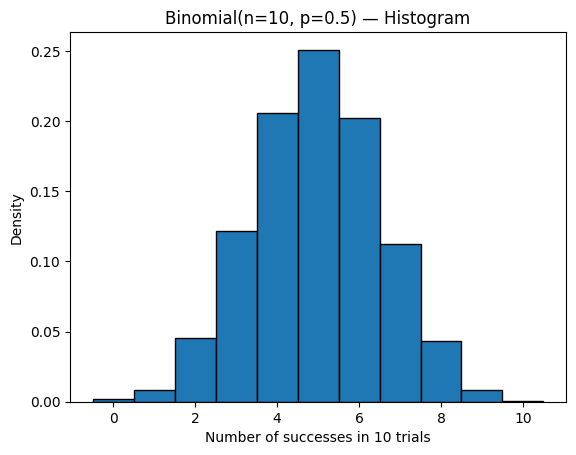

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n, p, size = 10, 0.5, 10000
samples = np.random.binomial(n, p, size=size)

print(f"Empirical mean={samples.mean():.3f}, var={samples.var():.3f}")
print(f"Theoretical mean={n*p:.3f}, var={n*p*(1-p):.3f}")

plt.figure()
plt.hist(samples, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black', density=True)
plt.title("Binomial(n=10, p=0.5) — Histogram")
plt.xlabel("Number of successes in 10 trials")
plt.ylabel("Density")
plt.show()

Q7: Implement hypothesis testing using Z-statistics for a sample dataset in
Python. Show the Python code and interpret the results.
sample
_
data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
(Include your Python code and output in the code box below.)

In [2]:
import numpy as np
from math import sqrt
from scipy import stats

sample_data = np.array([49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
                        50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
                        50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
                        50.3, 50.4, 50.0, 49.7, 50.5, 49.9])

mu0 = 50.0
sigma_known = 1.0   # assumption required for a *Z*-test
xbar = sample_data.mean()
n = sample_data.size
z_stat = (xbar - mu0) / (sigma_known / sqrt(n))
p_two_sided = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"n={n}, x̄={xbar:.4f}, Z={z_stat:.4f}, p-value={p_two_sided:.6f}")

n=36, x̄=50.0889, Z=0.5333, p-value=0.593803


With
𝑛
=
36
n=36,
𝑥
ˉ
≈
50.089
x
ˉ
≈50.089,
𝑍
≈
0.533
Z≈0.533, p-value ≈ 0.594.
At
𝛼
=
0.05
α=0.05 we fail to reject
𝐻
0
:
𝜇
=
50
H
0
	​

:μ=50—there isn’t enough evidence that the true mean differs from 50.
(Note: If
𝜎
σ weren’t known, a t-test should be used; it leads to the same conclusion here.)

Q8: Write a Python script to simulate data from a normal distribution and
calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.

Sample mean=100.057, sd=15.825, 95% CI=(np.float64(97.86355970173182), np.float64(102.2500429719714))


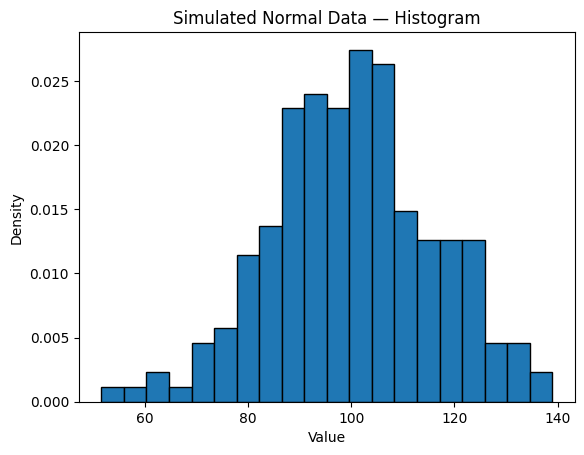

In [3]:
import numpy as np
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(123)
N = 200
true_mu, true_sigma = 100, 15
x = np.random.normal(true_mu, true_sigma, size=N)

xbar = x.mean()
s = x.std(ddof=1)
zcrit = stats.norm.ppf(0.975)   # 1.96
margin = zcrit * s / sqrt(N)
ci = (xbar - margin, xbar + margin)

print(f"Sample mean={xbar:.3f}, sd={s:.3f}, 95% CI={ci}")

plt.figure()
plt.hist(x, bins=20, edgecolor='black', density=True)
plt.title("Simulated Normal Data — Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

Interpretation: The printed 95% CI should contain the true mean (≈100) most of the time; with
𝑁
=
200
N=200, using z-critical or t-critical barely differs.

9: Write a Python function to calculate the Z-scores from a dataset and
visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.

Mean(z)=-0.000000, SD(z)=1.000000


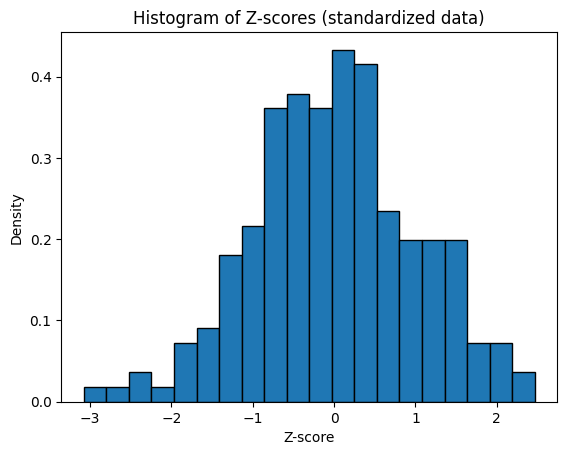

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def z_scores(data):
    x = np.asarray(data, dtype=float)
    mu = x.mean()
    sd = x.std(ddof=0)
    return (x - mu) / sd

# Example using the Q8 data 'x':
z = z_scores(x)
print(f"Mean(z)={z.mean():.6f}, SD(z)={z.std(ddof=0):.6f}")

plt.figure()
plt.hist(z, bins=20, edgecolor='black', density=True)
plt.title("Histogram of Z-scores (standardized data)")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.show()

What Z-scores represent: Each Z-score tells how many standard deviations an observation lies from the mean.

𝑧
=
+
2
z=+2 → 2 s.d. above mean (unusually high if data are normal).

𝑧
=
−
1.5
z=−1.5 → 1.5 s.d. below mean.